# ЕГЭ 2017 Вариант 2 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 2
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

In [5]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [6]:
# install.packages('')

In [7]:
answer_dictionary <- hash()

In [8]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")   

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1

## 1.

Дано $A = 325_8$, $B = {D7}_{16}$. 

Укажите число С, записанное в двоичной системе счисления, которое отвечает условию А < С < В. 

Основание системы счисления указывать не нужно. 

(Например, если ответ должен быть $1100_2$, в ответе нужно записать $1100$.)

--- 

$ A = 325_8 $, $ B = {D7}_{16} $ are given. 

Specify the number C, written in the binary system, which corresponds to the condition A < C < B. 

The base of the number system should not be indicated. 

(For example, if the answer is $ 1100_2 $, you need to write $ 1100 $ in the answer.)

In [12]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [13]:
# (325 _8)
A <- 3 * 8**2 + 2 * 8 ** 1 + 5 * 8 ** 0
A

[1] 213

In [14]:
# (D7 _16)
B <- 13 * 16**1 + 7 * 16 ** 0
B

[1] 215

In [16]:
dec2bin((A + B) / 2)

[1] "11010110"

In [56]:
answer_dictionary[1] <- dec2bin((A + B) / 2)

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трёх аргументов X, Y, Z.

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

---

A fragment of the truth table of the expression F, depending on three arguments X, Y, Z, is given.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 1 | 1 | 1 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

$1) \ \neg X \lor Y \land Z \\ 
2) \ \neg X \land Y \land Z \\ 
3) \ \neg X \lor Y \land \neg Z \\ 
4) \ \neg X \land Y \lor \neg Z \\ 
5) \ X \lor Y \lor \neg Z$

In [45]:
bc <- matrix(c(0,1,1, 1,0,1, 1,1,0), nrow=3, ncol=3, byrow = TRUE)

F <- function(X, Y, Z, I) {
    if (I == 1) {return(!X | Y & Z)}
    if (I == 2) {return(!X & Y & Z)}
    if (I == 3) {return(!X | Y & !Z)}
    if (I == 4) {return(!X & Y | !Z)}    
    if (I == 5) {return(X | Y | !Z)}    
} 

In [53]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(TRUE,FALSE,TRUE))){print(i)}
}

[1] 3
[1] 4


In [57]:
answer_dictionary[2] <- '34'

## 3.
В таблице приведена стоимость перевозок между соседними железнодорожными станциями. 

Перечислите в порядке возрастания, без пробелов и запятых, номера таблиц, соответствующих схеме.

---

The table shows the cost of transportation between neighboring railway stations. 

List in ascending order, without spaces or commas, the numbers of tables that are corresponding to the scheme.


| $1) $ | &#x123CF; | A | B | C | D | E | F |||$2)$ | &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| | **A** | &#x123CF; | 3 |  |  |  | 2 ||| | **A** | &#x123CF; | 3 |  |  |  | 2 |
| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 ||| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 |
| | **C** |  | 3 | &#x123CF; | 3 | 5 |  ||| | **C** |  | 3 | &#x123CF; | 2 | 5 |  |
| | **D** |  |  | 3 | &#x123CF; | 2 |  ||| | **D** |  |  | 2 | &#x123CF; | 3 |  |
| | **E** |  | 5 | 5 | 2 | &#x123CF; |  ||| | **E** |  | 5 | 5 | 3 | &#x123CF; |  |
| | **F** | 2 | 4 |  |  |  | &#x123CF; ||| | **F** | 2 | 4 |  |  |  | &#x123CF; |

| $3) $ | &#x123CF; | A | B | C | D | E | F |||$4)$ | &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| | **A** | &#x123CF; | 3 |  |  |  | 2 ||| | **A** | &#x123CF; | 3 |  |  |  | 2 |
| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 ||| | **B** | 3 | &#x123CF; | 3 | 5 |  | 4 |
| | **C** |  | 3 | &#x123CF; | 2 | 5 |  ||| | **C** |  | 3 | &#x123CF; | 2 | 3 |  |
| | **D** |  |  | 2 | &#x123CF; |  |  ||| | **D** |  |  | 2 | &#x123CF; | 5 |  |
| | **E** |  | 5 | 5 |  | &#x123CF; | 3 ||| | **E** |  | 5 | 3 | 5 | &#x123CF; |  |
| | **F** | 2 | 4 |  |  | 3 | &#x123CF; ||| | **F** | 2 | 4 |  |  |  | &#x123CF; |

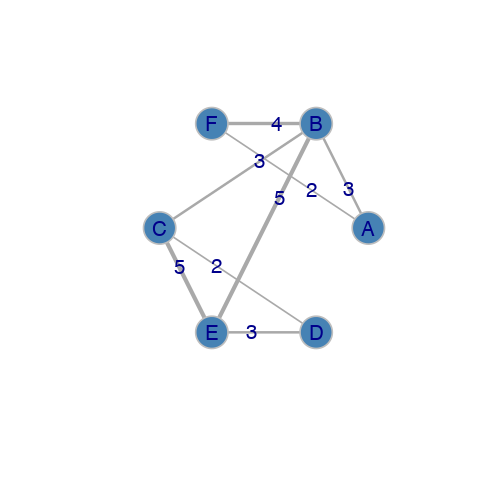

In [92]:
options(repr.plot.width=4,repr.plot.height=4)
edges <- c('A','B','A','F','B','C','B','E','B','F',
           'C','D','C','E','D','E')
weights <- c(3,2,3,5,4,2,5,3)
g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)
plot(g, layout=layout_in_circle(g),
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.width=E(g)$weight/2)

In [93]:
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

A B C D E F
A 0 3 0 0 0 2
B 3 0 3 0 5 4
C 0 3 0 2 5 0
D 0 0 2 0 3 0
E 0 5 5 3 0 0
F 2 4 0 0 0 0

In [94]:
answer_dictionary[3] <- '2'

## 4.
В каталоге находятся шесть файлов. / There are six files in the directory.

| 1 | 2 | 3 | 4 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| ask.c | kasko.cpp | kraska.doc | nebraska.docx | mask.pic | laska.dpr |

Ниже представлено восемь масок. / Bellow, you can see eight masks.

|  |  |  |  |
|:-:|:-:|:-:|:-:|
| `?ask*.???*` | `*ask*.*c*` | `*as??.*c*` | `*ask*.???` |
| `*a*a*.*d*` | `*aska*.?*?` | `?????*.???` | `?s*k?.*` |
Сколько из них таких, которым соответствует ровно три файла из данного каталога?

How many of them are those to which exactly three files from this catalog correspond?

## 5.
Для 5 букв латинского алфавита заданы их двоичные коды. Эти коды представлены в таблице. 

For 5 letters of the Latin alphabet their binary codes are given. These codes are presented in the table.

| A | B | C | D | E |
|:-:|:-:|:-:|:-:|:-:|
| `00` | `100` | `110` | `01` | `101` |

Определите, какой набор букв закодирован двоичной последовательностью `110011000011010101`. 

В ответе запишите последовательность букв без запятых.

Determine which set of letters is encoded with the binary sequence `110011000011010101`. 

In the answer, write down the sequence of letters without commas.

In [106]:
string <- '110011000011010101'
fragments <- c('00','100','110','01','101')
letters <- c('A','B','C','D','E')
result <- ''

while (string !='') {
    for (i in 1:5){
        if (substr(string,1,2) == fragments[i]) {
            result <- paste(result,letters[i],sep="")
            string <- substring(string,first=3,last=nchar(string))
        }
        if (substr(string,1,3) == fragments[i]) {
            result <- paste(result,letters[i],sep="")
            string <- substring(string,first=4,last=nchar(string))
        }
    }
}

result

[1] "CDBACED"

In [107]:
answer_dictionary[5] <- result

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. 

В этих числах все цифры не превосходят цифру 6 (если в числе есть цифра больше 6, автомат отказывается работать). 

По этим числам строится новое шестнадцатеричное число по следующим правилам.

1. Вычисляются два шестнадцатеричных числа — сумма старших разрядов полученных чисел и сумма младших разрядов этих чисел.

2. Полученные два шестнадцатеричных числа записываются друг за другом в порядке убывания (без разделителей).

_Пример._ Исходные числа: 25, 66. Поразрядные суммы: 8, В. Результат: В8. 

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

**A) 127 B) C6 C) BA D) E3 E) D1 **

---

The machine receives two two-digit hexadecimal numbers. 

In these numbers, all figures do not exceed 6 (if the number is greater than 6, the machine refuses to work). 

For these numbers, a new hexadecimal number is constructed according to the following rules.

1. Two hexadecimal numbers are calculated - the sum of the highest digits of the obtained numbers and the sum of the lowest digits of these numbers.

2. The received two hexadecimal numbers are written one after the other in descending order (without separators).

_Example._ Initial numbers: 25, 66. Bitwise sums: 8, B. Result: B8. 

Which of the suggested numbers can be the result of the operation of the machine?

List in alphabetical order the letters corresponding to these numbers, without spaces and punctuation marks.

**A) 127 B) C6 C) BA D) E3 E) D1**

Рассмотрим предложенные варианты:

- A) **127**
   - Цифры складываемых чисел не превышают $6_{10} \ ( 6_{16})$ => их поразрядные суммы не превышают $6_{10} + 6_{10} = 12_{10} \ ( 6_{16} + 6_{16} = C_{16} )$ => результат не может быть трехзначным в шестнадцатеричной системе.
   
- B) **C6** 
   - Возможный вариант сложения и перестановки цифр: $26_{16}$ и  $46_{16}$ поразрядно суммируются и получается пара $6_{16}, C_{16}$, затем цифры переставляются $C6_{16}$.
   
- C) **BA**  
   - Возможный вариант сложения и перестановки цифр: $55_{16}$ и  $56_{16}$ поразрядно суммируются и получается пара $A_{16}, B_{16}$, затем цифры переставляются $BA_{16}$.
   
- D) **E3**
  - $14_{10} \ ( E_{16})$ не может быть получена сложением двух цифр, не превышающих $6_{10} \ ( 6_{16})$.
  
- E) **D1**
  - $13_{10} \ ( D_{16})$ не может быть получена сложением двух цифр, не превышающих $6_{10} \ ( 6_{16})$.
  
---

Let's consider the offered variants:

- A) ** 127 **
    - The digits do not exceed $6_{10} \ (6_{16})$ => their bitwise sums do not exceed $6_{10} + 6_{10} = 12_{10} \ (6_{16} + 6_{ 16} = C_{16})$ => the result cannot be a three-digit number in the hexadecimal system.
    
- B) ** C6 **
    - A possible variant of adding and rearranging the numbers: $26_{16}$ and $46_{16}$ are digitally summed and the pair $6_{16}, C_{16}$ is obtained, then the digits are rearranged $C6_{16}$.
   
- C) ** BA **
    - A possible variant of adding and rearranging numbers: $55_{16}$ and $56_{16}$ are digitally summed and the pair $A_{16}, B_{16}$ is obtained, then the digits are rearranged $BA_{16}$.
    
- D) ** E3 **
   - $14_{10} \ (E_{16})$ cannot be obtained by adding two digits not exceeding $6_{10} \ (6_{16})$.
  
- E) **D1**
   - $13_{10} \ (D_{16})$ cannot be obtained by adding two digits not exceeding $6_{10} \ (6_{16})$.

In [109]:
answer_dictionary[6] <- 'BC'

## 7.
При работе с электронной таблицей в ячейку С3 записана формула: `=$B3+C$2`. 

Какой вид приобретёт формула, после того как ячейку С3 скопируют в ячейку D2?

---

When working with a spreadsheet, the following formula is written to cell C3: `=$B3+C$2`. 

What view will the formula get after the cell C3 is copied into the cell D2?

<div style="width: 800px; height: 300px; overflow:auto;">
    <img src="it_images/2017_02_07a.png" width="800" height="300"/>
</div>
[Google Sheet](https://drive.google.com/open?id=15cVwTSZcQXGLU83RAiDptIFrWVRgaBsS5YZ39uj8jwc)

In [111]:
answer_dictionary[7] <- '=$B2+D$2'

## 8.

## 9.

## 10.

## 11.

## 12.

## 13.

## 14.

## 15.

## 16.

## 17.

## 18.

## 19.

## 20.

## 21.

## 22.

## 23.

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2

## 24.

## 25.

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [112]:
answer_dictionary

<hash> containing 6 key-value pair(s).
  1 : 11010110
  2 : 34
  3 : 2
  5 : CDBACED
  6 : BC
  7 : =$B2+D$2